# Bilder

## Allgemein
Als erstes beschäftigen wir uns damit was Bilder sind bzw. wie sie aufgebaut sind:
* Ein Bild ist ein Array (Liste) von Pixeln, das durch Breite & Höhe definiert wird. Je nachdem kann man auch von einem 2D-Array sprechen.
* Pixel werden indizierte mit einer X-Koordinate (Spalte) und einer Y-Koordinate (Zeile)
* Ein Pixel besteht aus einer oder mehreren Komponenten (z.B. RGB (Red-Green-Blue) oder RGBA (Red-Green-Blue mit Alphakanal)
* Jede Komponente hat eine bestimmte Farbtiefe. Beispielsweise 8-bit --> 2^8 = 256 Abstufungen.
* Wir befinden uns im 8-bit RGB-Farbraum: 0 heißt das wenig von einer Komponente 

Heißt ein 8-bit RGB-Bild benötigt 24 bits (3 Bytes) je Pixel. Bei 1000*1000 Pixeln macht das dann 3 Millionen Bytes ->  ~2.8MB. Das ist bereits relativ viel, deswegen wurden verschiedene Kompressionsmethoden entwickelt (siehe nächstes Kapitel)

## Bildformate
Du kennst wahrscheinlich die einige Bildformate wie PNG oder JPG. Die Idee bei den Bildformaten ist es für unterschiedliche Anwendungsfälle gute Formate zu haben. PNG unterstützt zum Beispiel Transparenz und ist verlustfrei. JPG hingegen verliert ein paar Bildinformationen (verlustbehaftet), ist dafür jedoch um einiges kompakter als PNG von der Dateigröße. In diesem Beispiel laden wir das PPM Format, was relativ simpel ist (und deswegen für gewöhnlich auch nicht genutzt wird im Alltag :)

## Numpy
Wir verwenden https://numpy.org/ eine Bibliothek für Python in der man mathematische Operationen jeglicher Art durchführen kann


In [1]:
!pip install numpy
!pip install Pillow

In [2]:
# Funtion um ein Bild darzustellen, einfach ignorieren
import PIL.Image
import IPython.display
import numpy as np
def showarray(a):
    IPython.display.display(PIL.Image.fromarray(a))

PPM Dateiformat

Bei dem PPM Dateiformat handelt es sich um simples, Menschenlesbares Bildformat (siehe https://de.wikipedia.org/wiki/Portable_Anymap) Hier ist ein Beispiel für ein 4x4 RGB-Bild:
```
P3  # Signatur
4 4 # Breite & Höhe
15  # maximale Farbtiefe je Komponente
 0  0  0    0  0  0    0  0  0   15  0 15
 0  0  0    0 15  7    0  0  0    0  0  0
 0  0  0    0  0  0    0 15  7    0  0  0
15  0 15    0  0  0    0  0  0    0  0  0
```
Wie man sieht gibt es 16 (4*4 Pixel) Einträge mit je 3 Komponenten. Macht also insgesamt 48 Einträge.


Width: 512  Height: 512


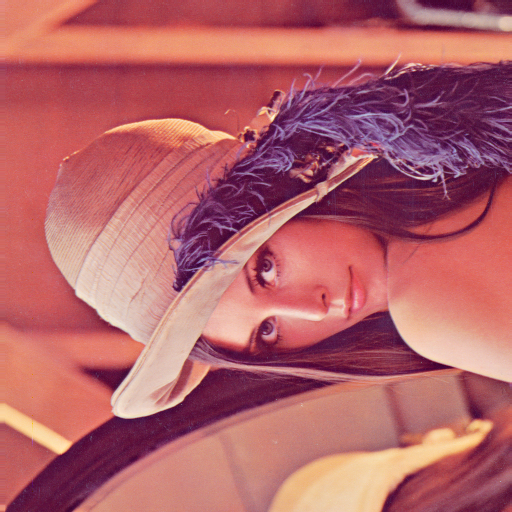

In [9]:
import numpy as np
import os

# Funktion um ein PPM-Bild zu laden (simples Bildformat)
# Siehe http://netpbm.sourceforge.net/doc/ppm.html
def load_ppm(path):       
    # Öffnen unseres Bilds und jede Zeile auslesen
    file = open(path, 'r')
    lines = file.readlines()
    
    # Die ersten 3 Zeilen der Datei enthalten Metainformationen zum Bild (Spezifikationen)
    # Die erte Zeile ist eine "Kennung"
    if lines[0].strip() != "P3":
        print("Not a supported PPM format")
        return
    
    # Die Größe steht in der zweiten Zeile
    W = int(lines[1].split(" ")[0])
    H = int(lines[1].split(" ")[1])
    
    print(f"Width: {W}  Height: {H}")
    
    # Unser Bild ist ein Array von Pixeln (Breite * Höhe mit jeweils 3 Komponenten je Pixel).
    # Da unsere Farbtiefe 8 bit ist, wählen wir als Datentyp uint8 
    # (eine Zahl ohne Vorzeichen (= unsigned) die bis 2^8 (256) geht)
    out = np.empty((W,H,3), dtype=np.uint8)
    # Unser aktueller Pixel-Index (der Pixel in den wir gerade etwas reinladen)
    x_index = 0
    y_index = 0
    component_index = 0
    
    # Wir verwenden slicing um die ersten 3 Zeilen zu ignorieren:
    # https://stackoverflow.com/questions/509211/understanding-slice-notation
    for line in lines[3:]:
        components = line.strip().split(" ")
        for component in components:
            out[x_index,y_index,component_index] = int(component)
            component_index+=1;
            
            # Wir gehen zum nächsten Pixel
            if component_index%3 == 0:
                x_index += 1
                component_index = 0
            
                # Wir gehen zur nächsten Zeile
                if x_index%W == 0:
                    y_index += 1
                    x_index = 0
                    
    return out

# Berühtmes Testbild https://de.wikipedia.org/wiki/Lena_(Testbild)    
img_array = load_ppm("data/lenna.ppm")
showarray(img_array)

# Aufgaben
- [ ] Lade das Bild um 90° im Uhrzeigersinn rotiert (Tipp: schau dir Indizierung vom NumPy Array an)
- [ ] Wie könnte man die Daten effizienter speichern? Lies dir in der Spezifikation (http://netpbm.sourceforge.net/doc/ppm.html) den Abschnitt zu P6 durch.
- [ ] Was machen die Befehle split() & strip() in Python?


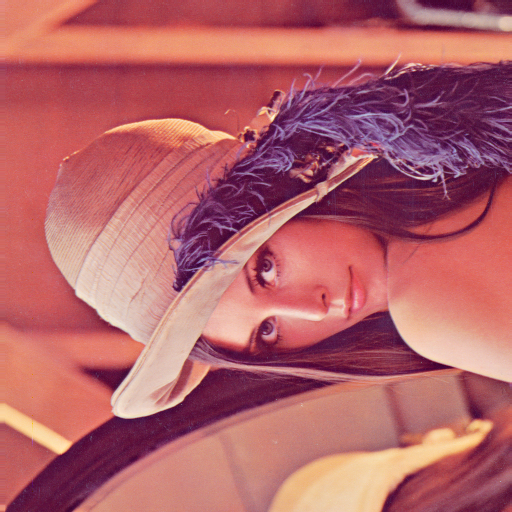

In [8]:
def to_grayscale(img):
    return img
    
showarray(to_grayscale(img_array))

# Aufgaben
- [ ] Implementiere die Funtkion **to_grayscale** die das Bild in Schwarz-Weiß darstellt (Tipp: damit ein Farbwert "grau" ist müssen alle Komponenten den selben Wert haben
- [ ] Finde heraus wie die einzelnen Komponenten gewichtet werden sollen: https://www.dynamsoft.com/blog/insights/image-processing/image-processing-101-color-space-conversion/
- [ ] Pass auf dass du eine Kopie erstellst, also nicht die Eingangsdaten in der Funktion veränderst
